# Майнор по Анализу Данных, Группа ИАД-4
## 23/11/2017 Оценка доверительных интервалов, бутстреп

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

RND_SEED = 1234

### Доверительный интервал для доли

Например, был проведен опрос, на котором респондентам задавали вопрос с бинарным ответом, который был закодирован `0` и `1` (Представим, что все люди честные). Требуется оценить доверительный интервал доли ответов.

In [2]:
np.random.seed(RND_SEED)

In [3]:
# Сначала генеральная совокупность
statistical_population = np.random.randint(2, size = 100000) 

# Теперь наша выборка
random_sample = np.random.choice(statistical_population, size = 1000)

In [4]:
# Истинное значение доли
statistical_population.mean()

0.50043000000000004

In [5]:
# Точечная оценка доли 
random_sample.mean()

0.47799999999999998

In [10]:
# Хотим доверительный интервал!
from statsmodels.stats.proportion import proportion_confint

#### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [7]:
normal_interval = proportion_confint(random_sample.sum(), random_sample.shape[0], method = 'normal', alpha=0.05)
normal_interval

(0.44704026099747746, 0.50895973900252256)

In [13]:
# Тоже самое только своими руками
def mean_confidence_interval(data, alpha=0.05):
    prob_s = data.sum()/len(data)
    left = prob_s - sp.stats.norm.ppf(1-alpha/2)*np.sqrt(prob_s*(1-prob_s)/len(data))
    right = prob_s + sp.stats.norm.ppf(1-alpha/2)*np.sqrt(prob_s*(1-prob_s)/len(data))
    return(left, right)

In [15]:
mean_confidence_interval(random_sample)

(0.44704026099747746, 0.50895973900252256)

#### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [16]:
wilson_interval = proportion_confint(random_sample.sum(), random_sample.shape[0], method = 'wilson')
wilson_interval

(0.44718362950053253, 0.50898474787283188)

#### Размер выборки для интервала заданной ширины

In [17]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [27]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [28]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [29]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')
normal_interval[1] - normal_interval[0]

0.019999625556771983

### Доверительный интервал для двух долей

Пускай у нас есть рекламные баннеры. Мы хотим сравнить их "кликабельность"

In [24]:
data = pd.read_csv('/Users/maxim_anisimov/Desktop/ML_data/data-2/banner_click_stat.txt', header = None, sep = '\t')
data.columns = ['banner_a', 'banner_b']

In [25]:
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [26]:
data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [40]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    left_boundary = sample1.mean() - sample2.mean() - sp.stats.norm.ppf(1-alpha/2)*np.sqrt((sample1.mean()*(1-sample1.mean())/len(sample1) + sample2_mean()*(1-sample2.mean())/len(sample2)))
    right_boundary = sample1.sum() - sample2.sum() + sp.stats.norm.ppf(1-alpha/2)*np.sqrt(sample1.sum()*np.sqrt((1-sample1.sum())/len(sample1) + sample2_sum()*(1-sample2_sum())/len(sample2)))
    return (left_boundary, right_boundary)   

SyntaxError: invalid syntax (<ipython-input-40-c75caf2a59e1>, line 2)

In [41]:
proportions_confint_diff_ind(data.banner_a, data.banner_b)

NameError: name 'sample2_sum' is not defined

  $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [42]:
pd.crosstab(data.banner_a, data.banner_b)

banner_b,0,1
banner_a,,
0,940,23
1,7,30


In [50]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = sp.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample1)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [52]:
proportions_confint_diff_rel(data.banner_a, data.banner_b)

(0.0018326041120652597, 0.012167395887934741)

## Доверительные интервалы для средних

Рассмотрим некий набор данных.

* Выберем два алгоритма классификации.
* Запустим кросс-валидацию с оценкой AUC
* Сравним средние AUC и их доверительные интервалы

In [54]:
from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.ensemble import RandomForestClassifier

In [55]:
X, y = datasets.make_blobs(300, centers=2, cluster_std=3, random_state=RND_SEED)

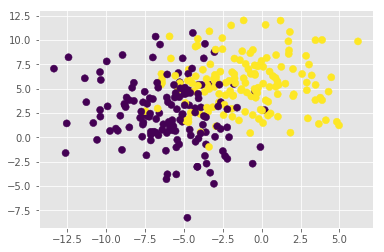

In [56]:
plt.scatter(X[:,0], X[:,1], c=y, s=50)

Выберите два алгоритма и оцените их AUC на каждой итерации кросс-валидации

In [57]:
model1 = linear_model.LogisticRegression()
model2 = RandomForestClassifier()

In [58]:
scores1 = cross_validation.cross_val_score(model1, X, y, scoring='roc_auc', cv=20)
scores2 = cross_validation.cross_val_score(model2, X, y, scoring='roc_auc', cv=20)

In [60]:
print (scores1.mean())
print (scores2.mean())

0.927519132653
0.884064094388


Доверительные интервалы для среднего можно оценить двумя способами.

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. 
Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, можно использовать выборочные дисперсии, и построить доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [61]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [62]:
n = 20
print (_zconfint_generic(scores1.mean(), np.sqrt(0.25/n), alpha=0.05, alternative='two-sided'))
print (_zconfint_generic(scores2.mean(), np.sqrt(0.25/n), alpha=0.05, alternative='two-sided'))

(0.70838849750891586, 1.1466497677972065)
(0.6649334592436098, 1.1031947295319007)


In [63]:
se1 = scores1.std(ddof=1)/np.sqrt(n) 
se2 = scores2.std(ddof=1)/np.sqrt(n)

In [65]:
print (_tconfint_generic(scores1.mean(), se1, alpha=0.05, dof=n-1, alternative='two-sided'))
print (_tconfint_generic(scores2.mean(), se2, alpha=0.05, dof=n-1, alternative='two-sided'))

(0.90070405667224218, 0.95433420863388019)
(0.84927847959394953, 0.91884970918156095)


## Доверительный интервал статистик на основе bootstrap

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [67]:
data = pd.read_csv('/Users/maxim_anisimov/Desktop/ML_data/data-2/verizon.txt', sep='\t')
data.shape

(1687, 2)

In [68]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

In [69]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


С помощью бутстрепа оцените 95% доверительные интервалы для медианы в каждой из категорий, а так же для разности медиан

In [70]:
sample1 = data.query('Group == "ILEC"').loc[:,'Time'].values
sample2 = data.query('Group != "ILEC"').loc[:,'Time'].values

In [71]:
sample1.shape

(1664,)

In [73]:
print (sample1.mean())
print (sample2.mean())

8.41161057692
16.5091304348


(array([  1.28300000e+03,   1.09000000e+02,   1.91000000e+02,
          1.80000000e+01,   2.00000000e+01,   1.50000000e+01,
          2.00000000e+00,   1.60000000e+01,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   0.  ,    9.58,   19.16,   28.74,   38.32,   47.9 ,   57.48,
          67.06,   76.64,   86.22,   95.8 ,  105.38,  114.96,  124.54,
         134.12,  143.7 ,  153.28,  162.86,  172.44,  182.02,  191.6 ]),
 <a list of 20 Patch objects>)

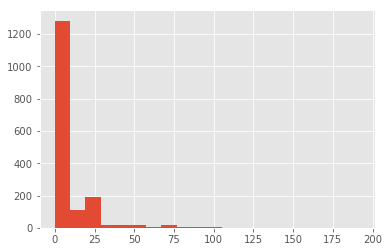

In [74]:
plt.hist(sample1, bins=20)

(array([ 5.,  5.,  2.,  2.,  5.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.   ,   4.816,   9.632,  14.448,  19.264,  24.08 ,  28.896,
         33.712,  38.528,  43.344,  48.16 ,  52.976,  57.792,  62.608,
         67.424,  72.24 ,  77.056,  81.872,  86.688,  91.504,  96.32 ]),
 <a list of 20 Patch objects>)

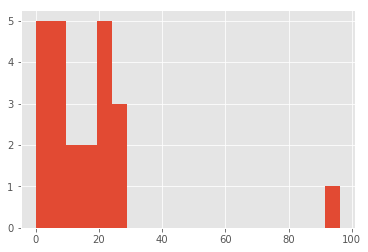

In [75]:
plt.hist(sample2, bins=20)

In [78]:
def bootstrap(sample, m=1000, func=np.median, level=0.05):
    medians = []
    for i in range(m):
        means.append(sample[np.random.randint(0, len(sample), len(sample))].median())
    medians.sort()
    return (np.percentile(means, level=level))

Работа бутстрепа
Есть выборка, нужно построить доверительный интервал для статистики
Теперь мы создаем m подвыборок с возвратом, в каждой подвыборке n элементов
Для каждой подвыборки считаем статистику (среднее), переводим все оценки матожидания в отсортированный массив
Затем берем квантили из отсортированного массива

## Доверительный интервал коэффициентов регрессии

С помощью бутстрепа оцените доверительный интервал коэффициентов регрессии на данных

In [79]:
from sklearn import datasets

In [80]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1,
                                n_targets=1, bias=2.0, tail_strength=0.5, noise=150, shuffle=True, random_state=RND_SEED)

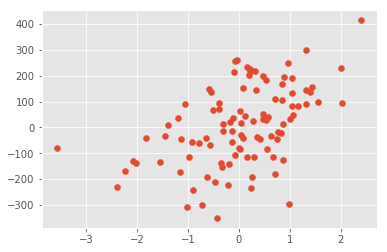

In [81]:
plt.scatter(X[:,0], y)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
# Your Code Here

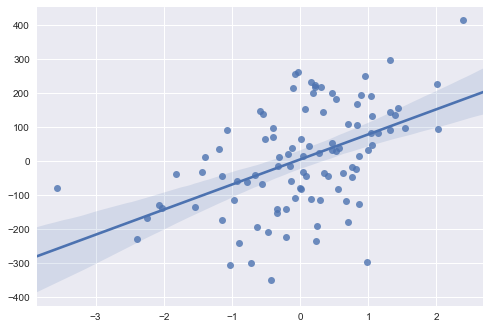

In [85]:
import seaborn as sns
sns.regplot(X, y)